<u>接第二次作业鸢尾花数据集处理方法</u>

In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,ComplementNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 替换sans-serif字体,用来正常显示中文标签,可选['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.
#import seaborn as sns
import numpy as np
import pandas as pd

In [27]:
# 代码同第二次作业
iris = datasets.load_iris() 
y = iris.target
X = pd.DataFrame(data=iris.data[:, [2, 3]], columns=np.array(iris.feature_names)[[2,3]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()  
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))   #shape是(150,2)
y_combined = np.hstack((y_train, y_test))   #shape是(150,)

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #画决策边界,AX是特征，y是标签，classifier是分类器，test_idx是测试集序号
    #设置标记生成器和彩色地图
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   #第一个特征取值范围作为横轴
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   #第二个特征取值范围作为纵轴
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  #reolution是网格剖分粒度，xx1和xx2数组维度一样
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)   
    #classifier指定分类器，ravel是数组展平；Z的作用是对组合的二种特征进行预测
    Z = Z.reshape(xx1.shape)   #Z是列向量
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  
    #contourf(x,y,z)其中x和y为两个等长一维数组，z为二维数组，指定每一对xy所对应的z值。
    #对等高线间的区域进行填充（使用不同的颜色）
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)   #全数据集，不同类别样本点的特征作为坐标(x,y)，用不同颜色画散点图
 
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]   #X_test取测试集样本两列特征，y_test取测试集标签
 
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    edgecolors='black',
                    s=55, label='test set')   #c设置颜色，测试集不同类别的实例点画图不区别颜色

# 1. SVM(Support Vector Machines)
——used for classification, regression and outliers detection.
<br>Support Vector Classification (SVC) 、Support Vector Regression (SVR) 

这里主要用到的是SVC
[sklearn中SVC中的参数说明与常用函数](https://blog.csdn.net/transformed/article/details/90437821?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165278134216780366582775%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165278134216780366582775&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-90437821-null-null.142^v10^pc_search_result_control_group,157^v4^control&utm_term=sklearn%E4%B8%BASVC%E6%8F%90%E4%BE%9B%E4%BA%86%E5%93%AA%E5%87%A0%E7%A7%8D%E6%A0%B8%E5%87%BD%E6%95%B0%EF%BC%9F&spm=1018.2226.3001.4187)

[机器学习分类算法之支持向量机](https://blog.csdn.net/weixin_47723732/article/details/122800504?ops_request_misc=&request_id=&biz_id=102&utm_term=poly%20gamma&utm_medium=distribute.pc_search_result.none-task-blog-2~blog~sobaiduweb~default-0-122800504.nonecase&spm=1018.2226.3001.4450)

<br> 在SVC中，如果数据是不平衡的(例如，许多正的和少数负的)，设置 class_weight='balanced' 和/或尝试不同的惩罚参数C。

<br> 核函数:
<br>**'linear'**：u'xv
<br>**'poly'**——polynomial多项式核函数：(gammaxu'xv + coef0)^degree
<br>**'rbf'**（默认）——Radial Basis Function径向基函数/高斯核函数Gaussian kernel：exp(-gamma|u-v|^2)
<br>**'sigmoid'**：tanh(gammaxu'xv + coef0)
## 1.1 线性分类——linear

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


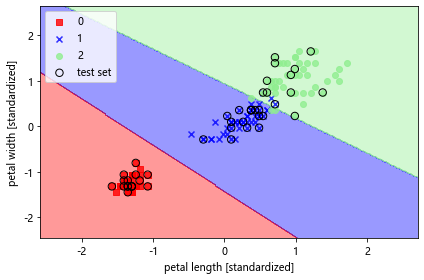

In [28]:
svm = SVC(kernel='linear',random_state=0)
#C的默认值是1，这是一个合理的默认值。如果有很多噪声值，应该降低C:降低C对应更多的正则化。
svm.fit(X_train_std, y_train)
 
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

利用线性SVM分类，分类效果如图所示。
如图可见有些点被分错类了，进一步，考虑利用核函数进行非线性分类。

## 1.2 非线性分类——rbf

two parameters must be considered: C and gamma.
<br>建议使用GridSearchCV，其中C和gamma之间的间隔呈指数级，以选择好的值。

[超参数C和gamma如何选择](https://liubingqing.blog.csdn.net/article/details/112383509?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-112383509-blog-82831301.pc_relevant_paycolumn_v3&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-112383509-blog-82831301.pc_relevant_paycolumn_v3&utm_relevant_index=2)

[RBF核函数中的gamma](https://blog.csdn.net/ITpfzl/article/details/82831301?ops_request_misc=&request_id=&biz_id=102&utm_term=rbf%20%20The%20larger%20gamma%20&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-2-82831301.142^v10^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

best score： 1.0 best gamma： 7.74


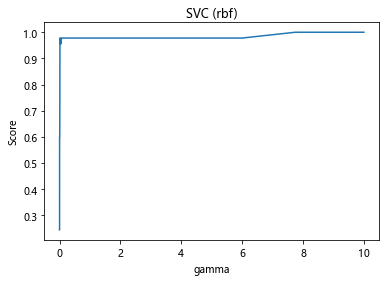

In [49]:
score = []
gamma_range = np.logspace(-10, 1, 100)  # 返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(X_train_std, y_train)
    score.append(clf.score(X_test_std, y_test))
print('best score：',round(max(score),2), 'best gamma：',round(gamma_range[score.index(max(score))],2))
best_gamma_rbf=gamma_range[score.index(max(score))]
#设置标题
plt. title('SVC (rbf)')
#设置x轴标签
plt. xlabel('gamma')
#设置y轴标签
plt. ylabel('Score')
plt.plot(gamma_range, score)
plt.show()

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


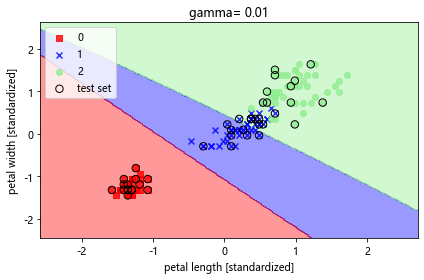

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


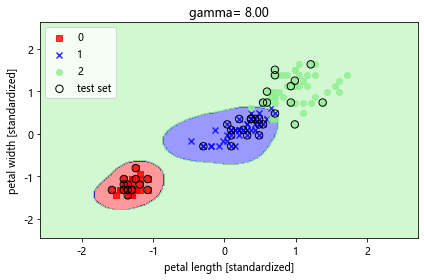

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


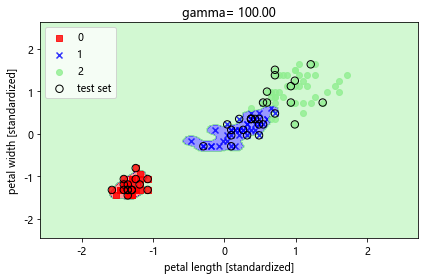

In [54]:
for i in (0.01,8,100):
    svm = SVC(kernel='rbf',C=1.0,gamma=i,random_state=0)
    svm.fit(X_train_std,y_train)

    plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('gamma= %.2f'% i)
    plt.tight_layout()
    plt.show()

## 1.2 非线性分类——poly

best score： 1.0 best gamma： 2.78


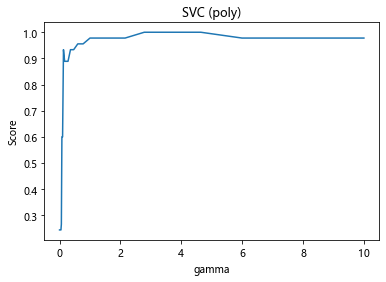

In [55]:
score = []
gamma_range = np.logspace(-10, 1, 100)  # 返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="poly", gamma=i, cache_size=5000).fit(X_train_std, y_train)
    score.append(clf.score(X_test_std, y_test))
print('best score：',round(max(score),2), 'best gamma：',round(gamma_range[score.index(max(score))],2))
best_gamma_rbf=gamma_range[score.index(max(score))]
#设置标题
plt. title('SVC (poly)')
#设置x轴标签
plt. xlabel('gamma')
#设置y轴标签
plt. ylabel('Score')
plt.plot(gamma_range, score)
plt.show()

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


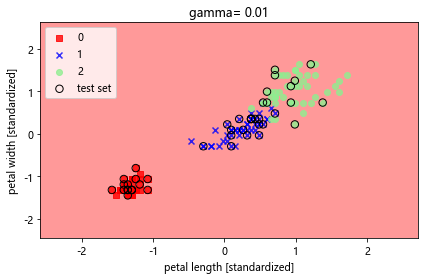

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


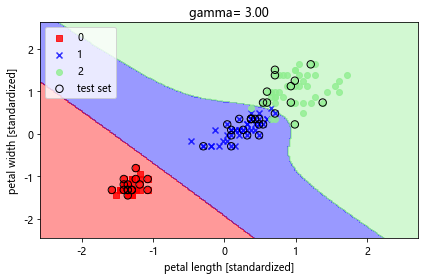

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


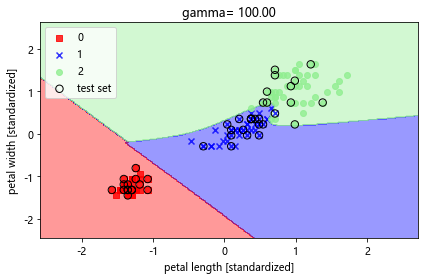

In [56]:
for i in (0.01,3,100):
    svm = SVC(kernel='poly',C=1.0,gamma=i,random_state=0)
    svm.fit(X_train_std,y_train)

    plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('gamma= %.2f'% i)
    plt.tight_layout()
    plt.show()

## 1.2 非线性分类——sigmoid

best score： 0.98 best gamma： 0.03


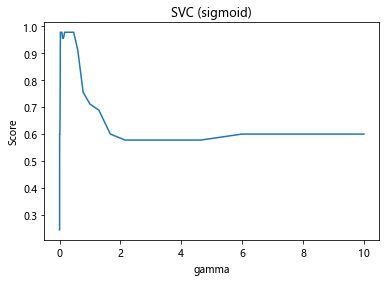

In [57]:
score = []
gamma_range = np.logspace(-10, 1, 100)  # 返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="sigmoid", gamma=i, cache_size=5000).fit(X_train_std, y_train)
    score.append(clf.score(X_test_std, y_test))
print('best score：',round(max(score),2), 'best gamma：',round(gamma_range[score.index(max(score))],2))
best_gamma_rbf=gamma_range[score.index(max(score))]
#设置标题
plt. title('SVC (sigmoid)')
#设置x轴标签
plt. xlabel('gamma')
#设置y轴标签
plt. ylabel('Score')
plt.plot(gamma_range, score)
plt.show()

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


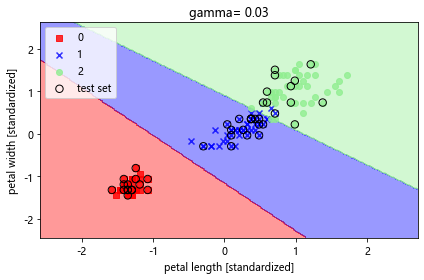

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


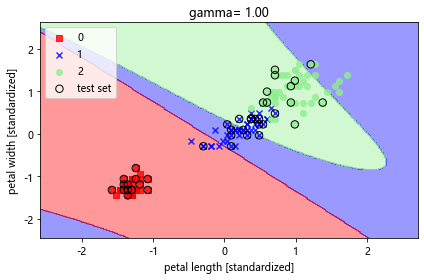

<ipython-input-27-c037d54b25a5>:46: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


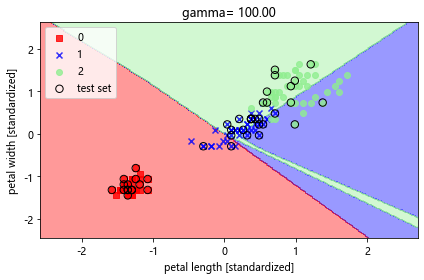

In [58]:
for i in (0.03,1,100):
    svm = SVC(kernel='sigmoid',C=1.0,gamma=i,random_state=0)
    svm.fit(X_train_std,y_train)

    plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('gamma= %.2f'% i)
    plt.tight_layout()
    plt.show()

# 2. 朴素贝叶斯分类器

虽然朴素贝叶斯被认为是一个良好的分类器，但它被认为是一个糟糕的估计器，所以 predict_proba 方法输出的概率不应该被太认真地对待。

<br>**①Gaussian Naive Bayes**——高斯朴素贝叶斯，原始数据是连续值且符合高斯分布，如大众的工资收入、人的身高体重等。

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)，参数\sigma_y\ \mu_y使用最大似然估计$

<br>只有两个，或者说一个参数：priors。priors是各类别的先验概率，如果没有则从数据集中计算得出。而另一个所谓的参数var_smoothing是为了计算稳定性。

<br>**②Multinomial Naive Bayes**——多项朴素贝叶斯，特征是离散值且满足多项式分布，文本分类中使用的两种经典朴素贝叶斯变式之一(数据通常表示为单词向量计数)。

<br>对每个类 y 而言，分布由向量 $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ 参数化, n是特征个数(在文本分类中，是词汇量)，$\theta_{yi}$是样本中的特征 i 属于 y 类的概率$P(x_i \mid y)$。参数$\theta_y$由最大似然的平滑估计（常用拉普拉斯平滑），即相对频率计数:$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$，$N_{yi} = \sum_{x \in T} x_i$ 是在训练集 T 中特征 i 出现在y类的样本的次数，$N_{y} = \sum_{i=1}^{n} N_{yi}$。
<br>。。。*还是直接看视频中的例子吧，来得直观些。[贝叶斯分类器](https://www.bilibili.com/video/BV1v7411d75n?p=3)*

<br>三个参数，alpha, fit_prior, class_prior。参数alpha是在计算概率的时候进行拉普拉斯平滑，fit_prior表示是否学习先验概率，而class_prior是给定的先验概率，如果没有给定则从数据集中自行计算。


<br>**③Complement Naive Bayes**——补充朴素贝叶斯，用来纠正标准MultinomialNB的一个严重假设。该分类器的用途：特别适合样本不平衡的数据集。

**④Bernoulli Naive Bayes**——伯努利朴素贝叶斯，与MultinomialNB的唯一区别在于，MultinomialNB的特征是类似词频这种特征，而BernoulliNB使用的是布尔类型的特征，即这个词有没有出现过。
BernoulliNB在那些短文本，并且关键词区分度比较明显的场景中，可能效果会很好。

**⑤Categorical Naive Bayes**——分类朴素贝叶斯，适用于具有分类分布的离散特征的分类。 每个特征的类别都来自一个分类分布。

[sklearn中的naive bayes算法](https://blog.csdn.net/bitcarmanlee/article/details/121452518?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165250875016781683991069%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165250875016781683991069&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-2-121452518-null-null.142^v9^pc_search_result_control_group,157^v4^control&utm_term=%E5%88%86%E5%88%AB%E7%94%A8Gaussian+Naive+Bayes%E3%80%81Multinomial+Naive+Bayes%E5%92%8CBernoulli+Naive+Bayes%EF%BC%8C%E5%AF%B9%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E9%9B%86%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB&spm=1018.2226.3001.4187)

[基于朴素贝叶斯的鸢尾花数据集分类](https://blog.csdn.net/m0_37758063/article/details/123983883?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165250889816782248515838%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165250889816782248515838&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-2-123983883-null-null.142^v9^pc_search_result_control_group,157^v4^control&utm_term=%E5%88%86%E5%88%AB%E7%94%A8%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AF%B9%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E9%9B%86%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB&spm=1018.2226.3001.4187)

[贝叶斯算法 案例一：鸢尾花数据分类](https://blog.csdn.net/leva345/article/details/118722993?ops_request_misc=&request_id=&biz_id=102&utm_term=%E5%88%86%E5%88%AB%E7%94%A8%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AF%B9%E9%B8%A2%E5%B0%BE%E8%8A%B1%E6%95%B0%E6%8D%AE%E9%9B%86%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-3-118722993.142^v9^pc_search_result_control_group,157^v4^control&spm=1018.2226.3001.4187)

[鸢尾花-朴素贝叶斯方法](https://blog.csdn.net/weixin_39852647/article/details/114054333?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165278847616781683957910%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165278847616781683957910&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-1-114054333-null-null.142^v10^pc_search_result_control_group,157^v4^control&utm_term=%E9%B8%A2%E5%B0%BE%E8%8A%B1MultinomialNB&spm=1018.2226.3001.4187)

## 2.1 GaussianNB

In [32]:
gnb = GaussianNB()
gnb.fit(X_train_std,y_train)
y_train_pred = gnb.predict(X_train_std)
print("在 %d 个训练样本中，预测错误有: %d 个" % (X_train_std.shape[0], (y_train != y_train_pred).sum()))
print('训练集准确度：%.2f%%' % (100 * accuracy_score(y_train, y_train_pred)))
y_test_pred = gnb.predict(X_test_std)
print("在 %d 个测试样本中，预测错误有: %d 个" % (X_test_std.shape[0], (y_test != y_test_pred).sum()))
print('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_pred)))

在 105 个训练样本中，预测错误有: 5 个
训练集准确度：95.24%
在 45 个测试样本中，预测错误有: 1 个
测试集准确度：97.78%


## 2.2 MultinomialNB

In [33]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_train_pred = mnb.predict(X_train)
print("在 %d 个训练样本中，预测错误有: %d 个" % (X_train.shape[0], (y_train != y_train_pred).sum()))
print('训练集准确度：%.2f%%' % (100 * accuracy_score(y_train, y_train_pred)))
y_test_pred = mnb.predict(X_test)
print("在 %d 个测试样本中，预测错误有: %d 个" % (X_test.shape[0], (y_test != y_test_pred).sum()))
print('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_pred)))

在 105 个训练样本中，预测错误有: 62 个
训练集准确度：40.95%
在 45 个测试样本中，预测错误有: 32 个
测试集准确度：28.89%


## 2.3 BernoulliNB

In [34]:
bnb = BernoulliNB()
bnb.fit(X_train_std,y_train)
y_train_pred = bnb.predict(X_train_std)
print("在 %d 个训练样本中，预测错误有: %d 个" % (X_train_std.shape[0], (y_train != y_train_pred).sum()))
print('训练集准确度：%.2f%%' % (100 * accuracy_score(y_train, y_train_pred)))
y_test_pred = bnb.predict(X_test_std)
print("在 %d 个测试样本中，预测错误有: %d 个" % (X_test_std.shape[0], (y_test != y_test_pred).sum()))
print('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_pred)))

在 105 个训练样本中，预测错误有: 27 个
训练集准确度：74.29%
在 45 个测试样本中，预测错误有: 14 个
测试集准确度：68.89%


# 3.基于贝叶斯网络的简单计算练习

已知昨天下过雨（RAIN）、开喷水器（SPRINKLER）和早晨观察到草地是湿的（GRASS WET）之间的依赖关系和条件概率如下所示。
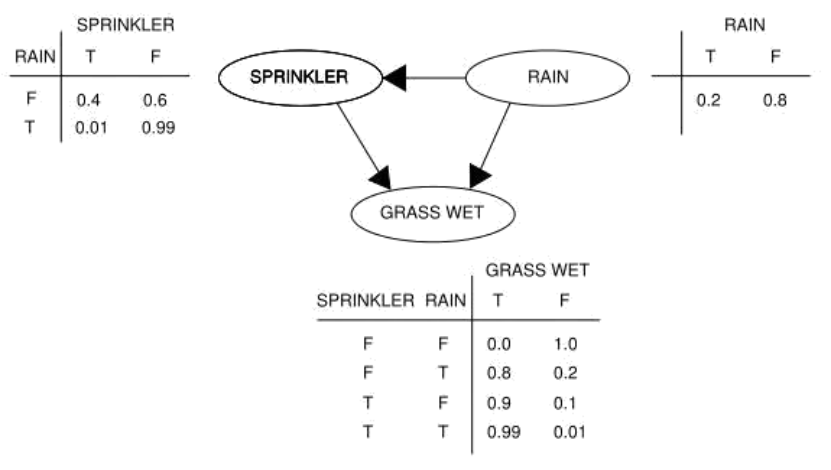
问：早晨起来发现草地是湿的，昨天下过雨的可能性有多大？

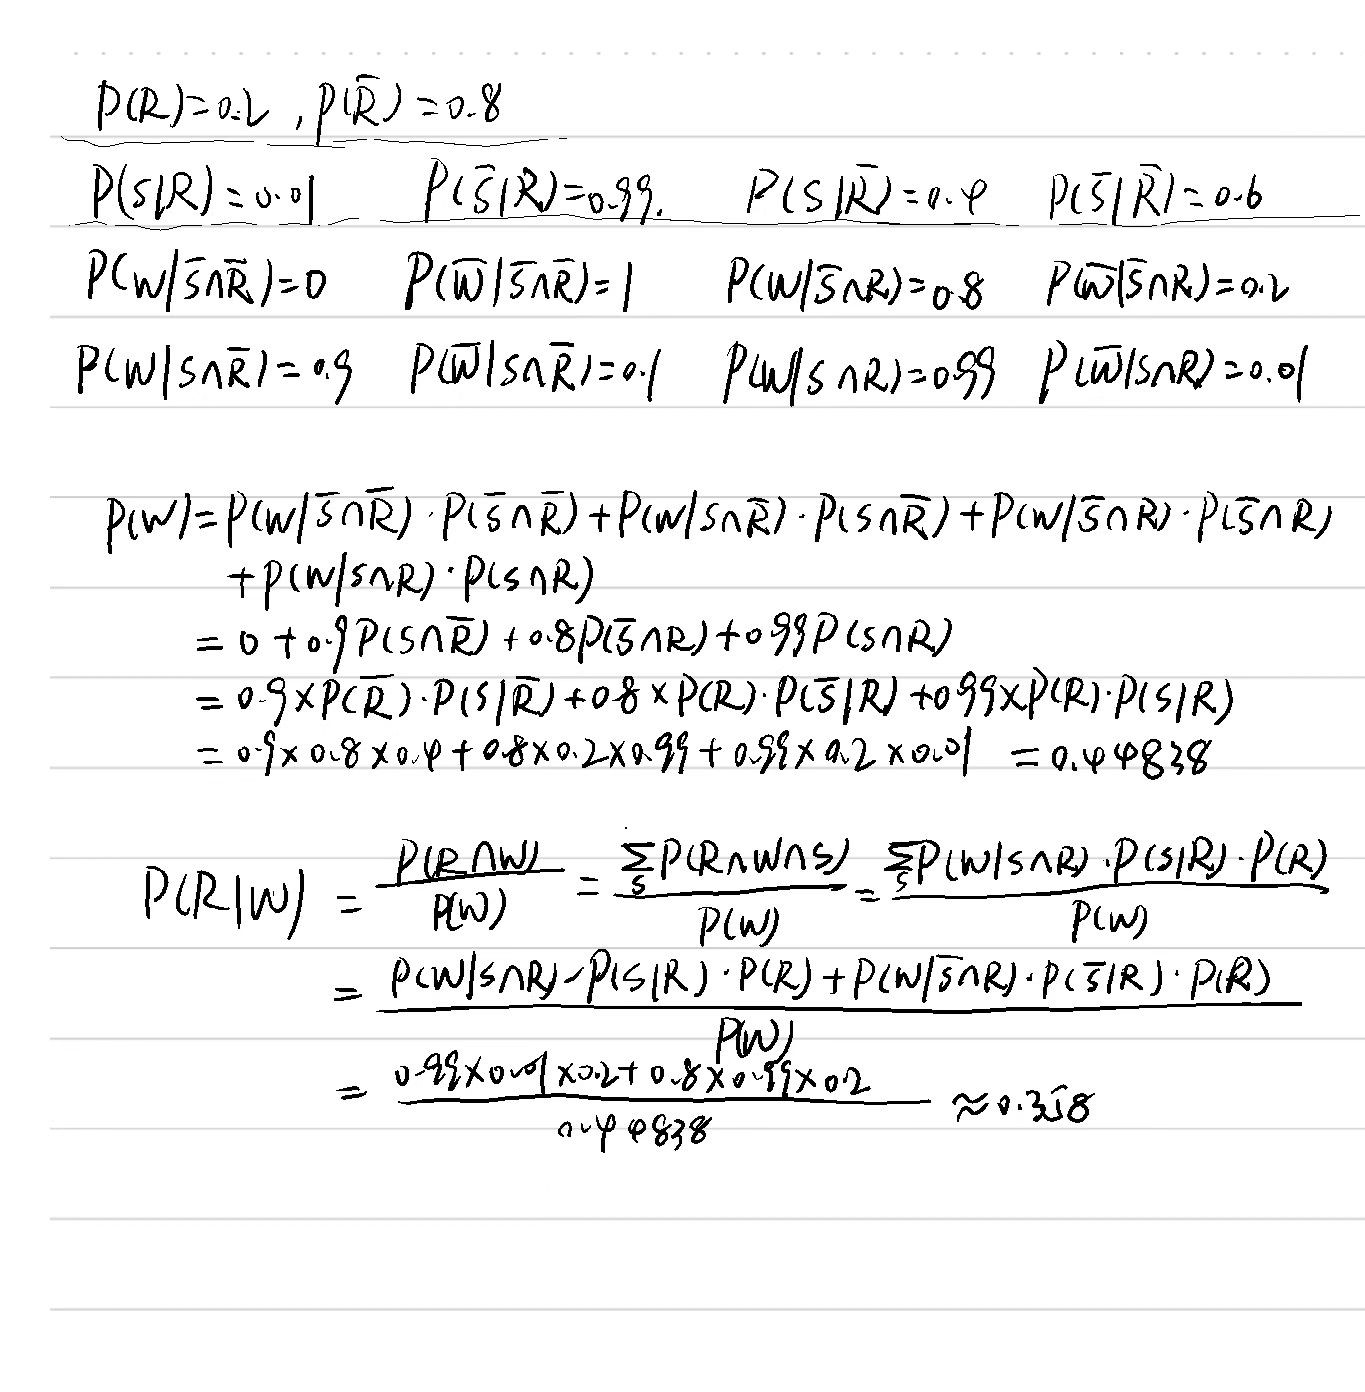